In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Part 1: Temporal Patterns

In this exercise we will focuse on patterns over time for the 14 ``focuscrimes``. 

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [4]:
## Import the data
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


### Weekly patterns 

Initially we will look at the patterns over a weekly basis, from monday to sunday.

In [5]:
# dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# groupby category and day of week
temp = temp.groupby(['Category','DayOfWeek']).count().X.unstack()
# Arrange the dataframe so the weekday match the order of the week
temp = temp[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

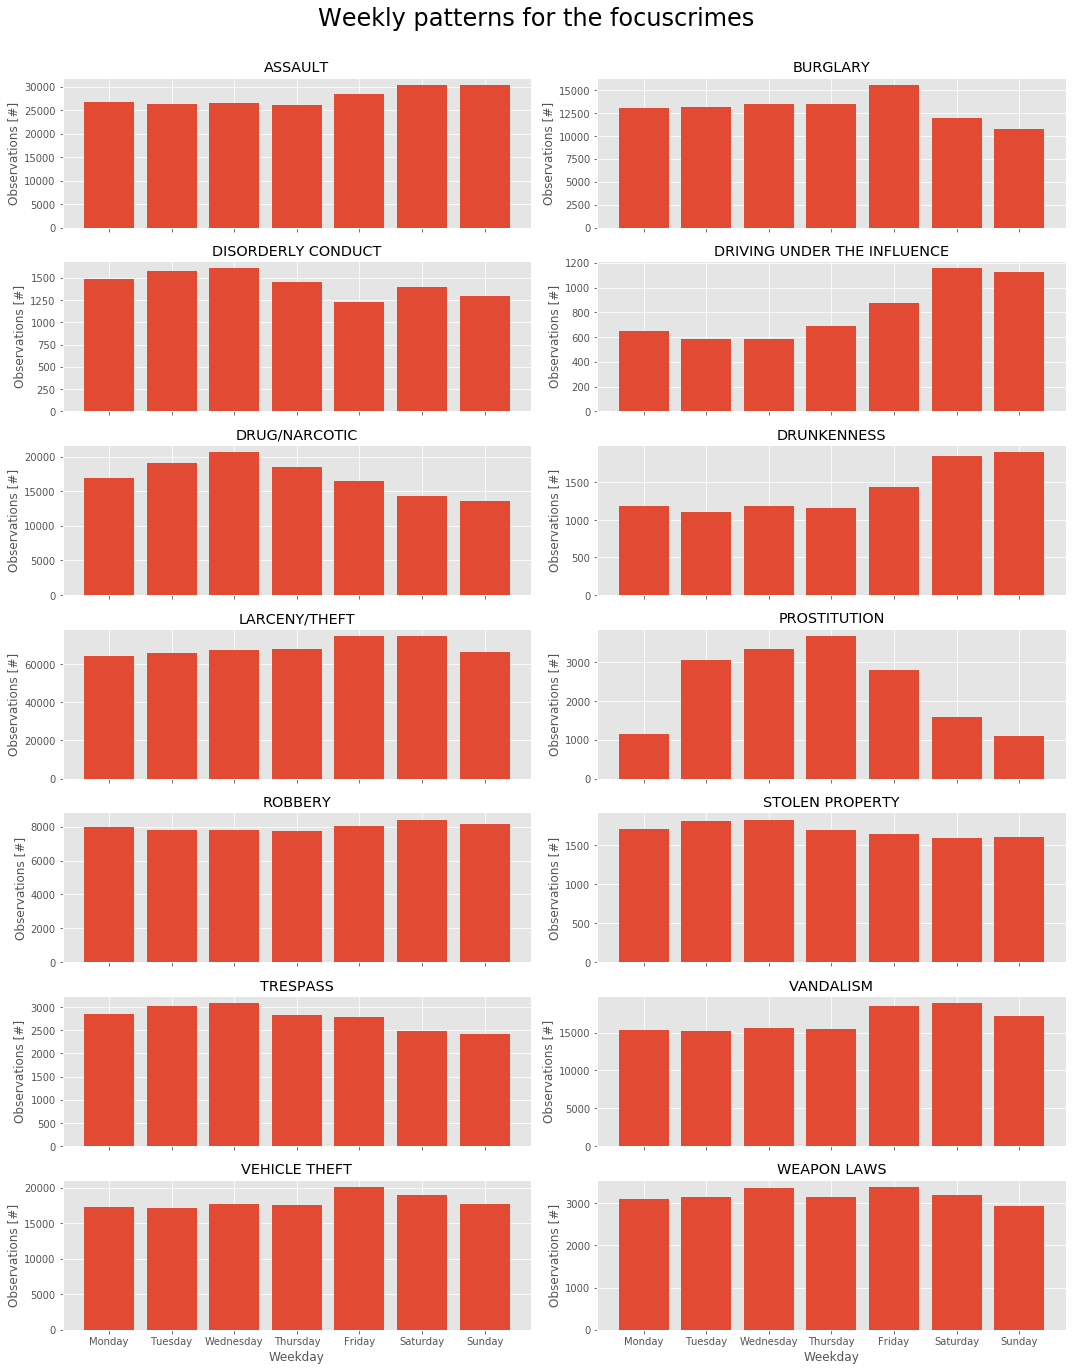

In [6]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index,temp.loc[crimes[p]].values)
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1

# Specify x axis label
axs[6,0].set_xlabel('Weekday')
axs[6,1].set_xlabel('Weekday')
# Title for subplot
plt.suptitle('Weekly patterns for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From the plot several interesting patterns can be seen.
- ``DRIVING UNDER THE INFLUENCE`` and ``DRUNKENNESS`` peaks during the weekend which is as expected.
- ``BURGLARY`` has its peak during friday which might be because many people go out on fridays and many homes are left empty.
- ``PROSTITUTION`` peaks during mid week which is rather unexpected.
- ``DRUG/NARCOTIC`` peaks during wednesday and is at its lowest during the weekend.

### The months (yearly patterns)
To check if some months are worse than others, the yearly pattern is plotted for all focuscrimes.

In [7]:
# Convert the date and time to datetime
df['Datetime'] = pd.to_datetime(df['Date']+ ' ' + df['Time'])

In [8]:
# Make a new column specifying the 
df['month'] = df['Datetime'].dt.month
# Dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# Group the data by category and month
temp = temp.groupby(['Category','month']).count().X.unstack()

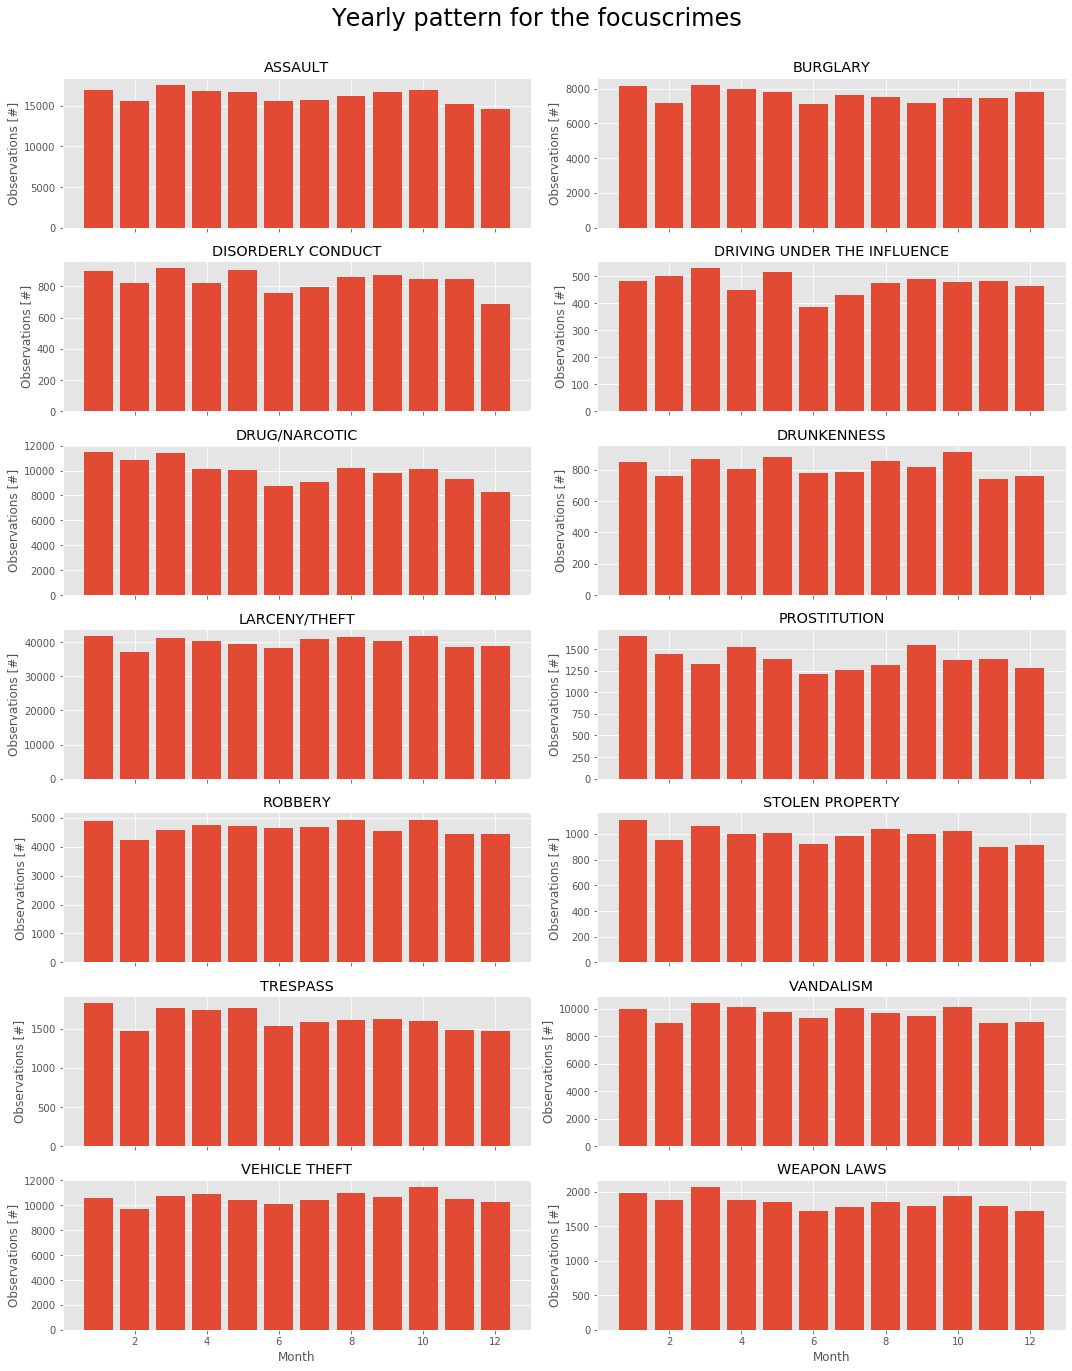

In [9]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index,temp.loc[crimes[p]].values)
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1
        
# Specify x axis label
axs[6,0].set_xlabel('Month')
axs[6,1].set_xlabel('Month')
# Title for subplot
plt.suptitle('Yearly pattern for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From these plots it can be seen that most crimes appear to be at around the same level through out the year. Some categories like ``DRUG/NARCOTIC`` do however have fewer crimes during the summer months and december. This could be due to people being on holidays and thereby generally fewer people around.

### 24 hour cycle 
To get an idea of if a crime happens during a specific time of the day, the crimes are plotted over a 24 hour cycle.

In [10]:
# Column with the recorded hour of the crime
df['hour'] = df['Datetime'].dt.hour
# Dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# Group the data by category and month
temp = temp.groupby(['Category','hour']).count().X.unstack()

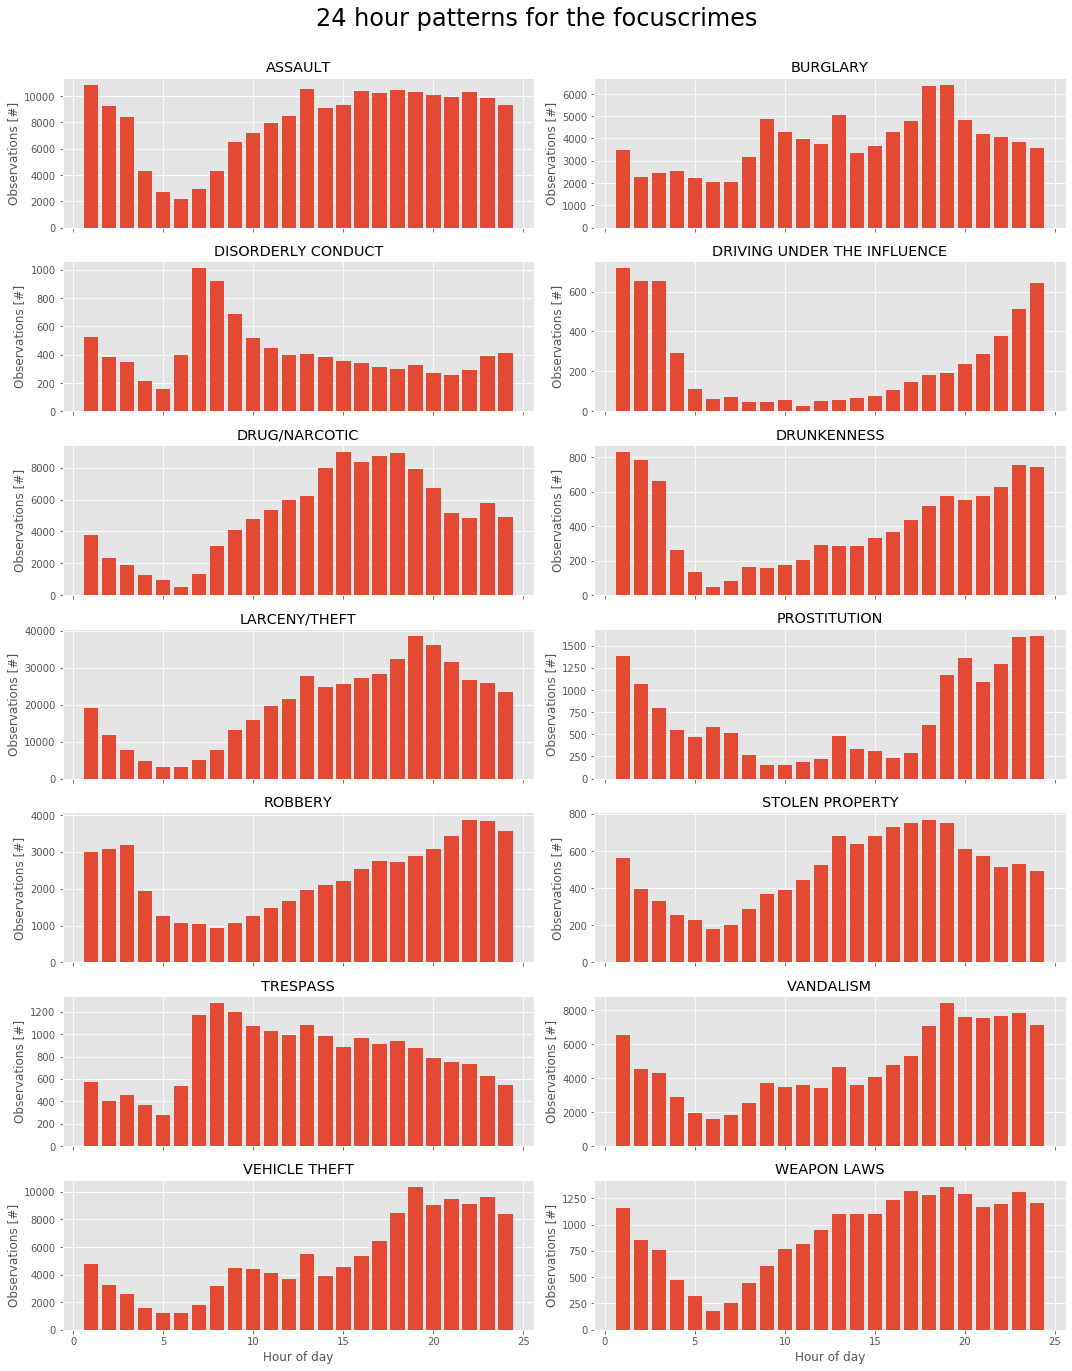

In [11]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index+1,temp.loc[crimes[p]].values) # add 1 so it matches the real hour
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1
        
# Specify x axis label
axs[6,0].set_xlabel('Hour of day')
axs[6,1].set_xlabel('Hour of day')
# Title for subplot
plt.suptitle('24 hour patterns for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From these plots it can be seen that the pattern on a 24 hour cycle are very different depending on the crime type. Some of the interesting patterns are described below.
- For some of the categories such as ``DRIVING UNDER THE INFLUENCE``, ``DRUNKENNESS`` and ``PROSTITUTION`` most of the crimes happen the recorded crimes happens during the night.
- For the categories like ``DRUG/NARCOTIC``and ``LARCENY/THEFT`` it can be seen that most of the crimes happens during the day hours.
- For categories like ``TREPASS`` and ``DISORDERLY CONDUCT`` the peak amount of crimes is in the morning whereafter less crimes appear through out the day.

### Hours of the week 
Lastly it is interesting to see if the 24 hour cycle changes chrough out the week. Therefor all crimes are plotted for the 168 hours of the week.

In [ ]:
temp = df[df['Category'].isin(focuscrimes)] #creating a dataframe that only contains focus crimes 
temp = temp.groupby(['Category', 'hour','DayOfWeek']).size() #group by category and year_of_crime
temp = temp.unstack().unstack() #using unstack a couple of times so it will be turned to the correct dataframe
temp = temp[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
temp


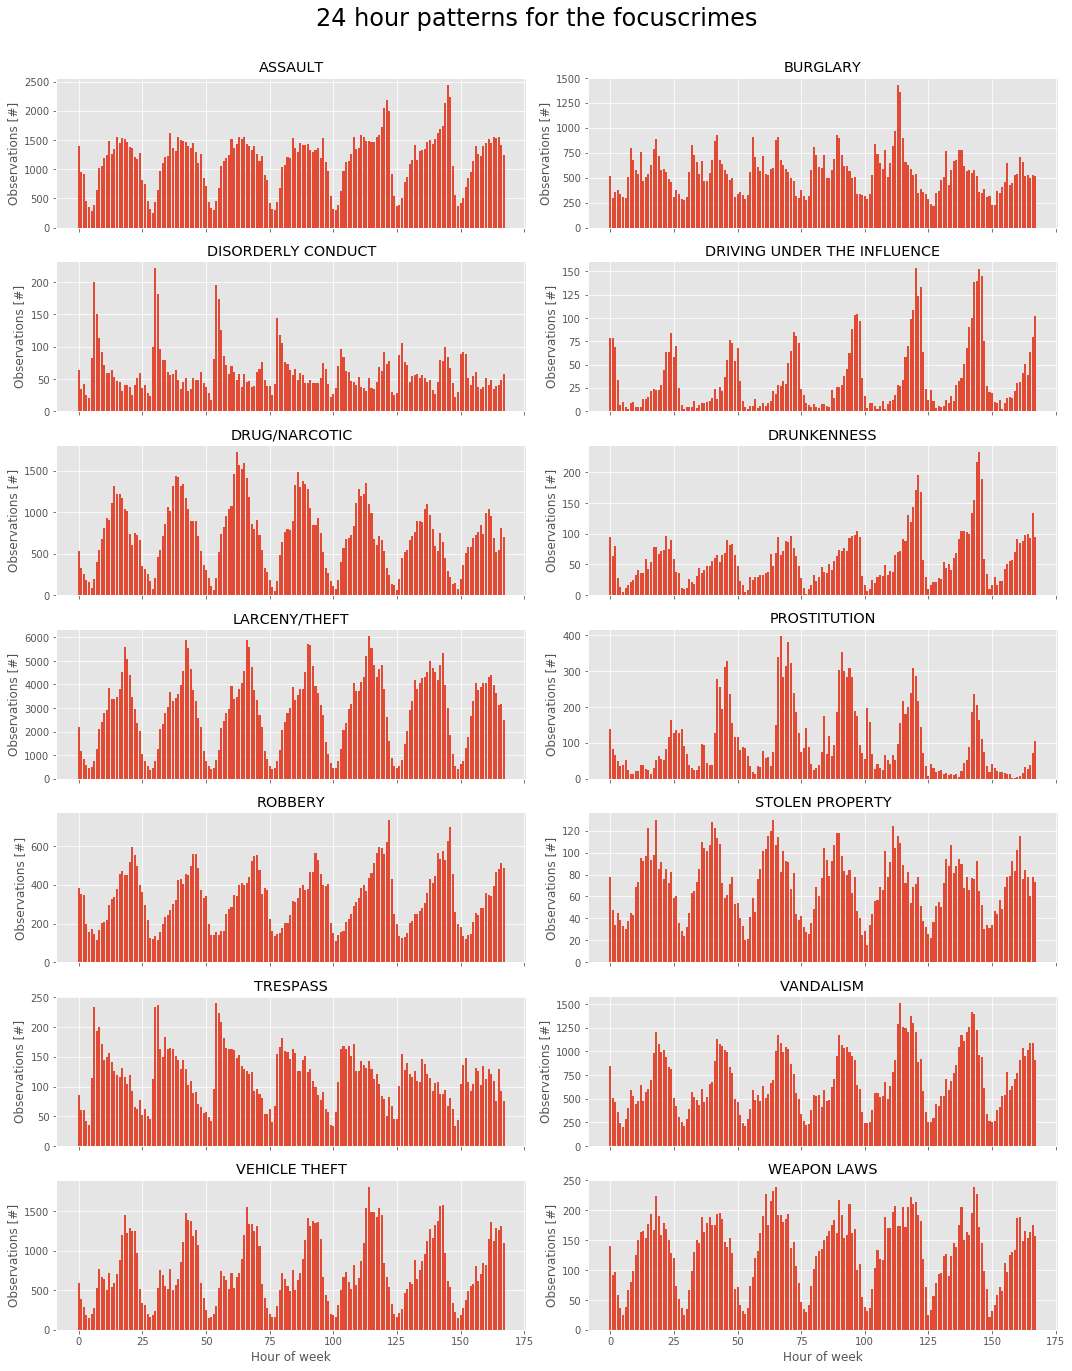

In [16]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)

# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
ind = temp.index 
p = 0
for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(range(0,len(temp.loc[ind[1]].index)),temp.loc[ind[p]].values);
        axs[i,j].set_title(ind[p])
        axs[i,j].set_ylabel('Observations [#]')
        p+=1

# Specify x axis label
axs[6,0].set_xlabel('Hour of week')
axs[6,1].set_xlabel('Hour of week')
# Title for subplot
plt.suptitle('24 hour patterns for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plots above show similar patterns on a daily basis as the plots for a 24 hour cycle. However, the amount of observations differ through out the week for certain crimes, and some crimes have large spikes in observations. Below some of the interesting crimes are described.
- ``DISORDERLY CONDUCT`` has a similar pattern through out the week, but it has some very large spikes from mondag to wednesday in the early hours of the day.
- ``BURGLARY`` has large spikes for 2 hours during friday.
- ``PROSTITUTION`` has some very large spikes during the mid part of the week. 

## Part 2: Thinking about data and visualization
### Questions for the first video

#### What is the difference between data and metadata?
Data can be some information or a list of observations where metadata is some informations about the data which helps us understand our data better. With regard to the bike-example we had our raw data, which was simply the *messy* datafile, and we add some context, some metadata, by looking at the bike route through for example google earth.

#### Sune says that the human eye is a great tool for data analysis. Do you agree?
The human eye is a great tool for data analysis as we use it every day for analysing everything we do. 
### The human eye is great at **HJÆLP!!** MENTION SOMEHTIN GTHAT IS DIFFICULT FOR THE HUMAN EYE!

#### Example of Simpsons's paradox
Let's say that you want to go out to get a good Dürum at Nørrebro with your friend. This can be very tricky as there allmost as many people as Dürum places within Nørrebro, so deciding on one can take ages. To make it easier you decide that both you and your friend should find a Dürum place with good reviews online and then you will simply pick the one with the best reviews, sounds easy right? 

You find a Dürum place called Dürumsymfonien which is recommended by a higher percentage of both men and woman than your friends Dürum place, Dürumbar. Just as you are about to lace up your shoes your friend, using the exact same data, finds that Dürumbar is recommended by a higher percentage of all users, so it is clearly the winner. As you are very hungry you decide to just eat a Dürum from both places and figure out what the heck is going on when you come back home with a full belly. 

Upon arriving home your realize that you had entered the Simpson's Paradox, where both Dürum places can be better and worse than eachother, where a dataset can be used to prove two opposing arguments. Below the reviews of the two Dürum places are showed.

| | Dürumbar | Dürumsymfonien |
|---|---|---|
|Male | 30/100 = 30% |105/200 = 53% |
|Female | 200/250 = 80% | 9/10 = 90% |
|Combined | 230/350 = 66% | 114/210 = 54%|

The problem appears as the amount of reviews is not accounted for. Dürumbar has a lot more reviews from females than Dürumsymfonien and Dürumsymfonien has a lot more reviews from males than Dürumbar.

## hente MEGET inspiration herfra: https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9 for meget?

#### Difference between exploratory and explanatory data analysis
Doing exploratory data analysis is all about structuring and visualizing the data to try to understand what data you have, and what interesting stories and evidence may lie hidden in the data. Explanatory data analysis on the other hand is about visualizing the data for an audience, showing what you found in the exploratory analysis in a understandable way. The difference can be seen as the difference between doing an presentation and all the hard work which lies behind it, where the presentation is the explanatory analysis and all the notes, calculations, litterature reading etc., which is only for yourself, is the exploratory data analysis.

*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
* What is the difference between *data* and *metadata*? How does that relate to the bike-example?
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
* In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 


### Questions for the second video lecture

#### Explain how the Pearson correlation works and write down its mathematical formulation. Can you think of an example where it fails (and visualization works)?


#### What is the difference between a bar-chart and a histogram?

#### How do you find the right bin-size for a hisogram?

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading? 

## Part 4: Heatmaps of geo-data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium

#This part of the notebook is computed with inspiration from: 
#https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

*Exercise: A new take on geospatial data using Folium.*

We are now studying geospectral data by plotting raw data points and heatmaps.

* First start by plotting a map of San Francisco with a nice tight zoom. 

In [30]:
map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13) #Generating the folium Map, 
                                                    # the map type can be changed to different styles: 
                                                    # tiles_list = ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]
map_SF #display the map

* Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map.

In [31]:
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(map_SF) #pop-up marker is added to the map
map_SF

### Point scatter plot:

* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. We can call this a kind of visualization a point scatter plot.

The year 2017 is chosen, and the month February and March will be investigated in the below point scatter plot.

In [5]:
#import csv file
data = pd.read_csv("Week1/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv") #import data
data['Datetime']= pd.to_datetime((data['Date'] + ' ' + data['Time'])) #creating a datetime column
df = data[data['Category'] == 'DRUG/NARCOTIC']

In [6]:
#selecting only to work with two months
df_febmar_17=df[(df['Datetime']>='2017-02-01 00:00:00') & (df['Datetime']<'2017-04-01 00:00:00')]
print('Number of observations in february and march 2017:', df_febmar_17.size)

Number of observations in february and march 2017: 8106


In [32]:
#plotting the point scatter plot ontop of the map
[folium.CircleMarker(
                     location=[df_febmar_17['Y'].iloc[i] , df_febmar_17['X'].iloc[i]], #Given all relevant coordinates 
                     radius=1, #setting the radius of the marker to 1
                     color='#0080bb') #selecting the prefered color of the datapoints
                     .add_to(map_SF) #adding the points to the map
                     for i in range(len(df_febmar_17))] # adding all the point by using a for-loop
map_SF

# DO WE WANT THE CITYHALL ON THE MAP OR NOT?? /JESPER

### Heatmap:

* To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.


In [99]:
from folium import plugins
from folium.plugins import HeatMap

map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Ensure you're handing it floats
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
df_heat = data[data['Category'] == 'SEX OFFENSES, NON FORCIBLE'] # Reducing data size so it runs faster
df_heat = df_heat[['Y', 'X']] 

# List comprehension to make out list of lists
data_heat = [[row['Y'],row['X']] for index, row in df_heat.iterrows()]

#Plot it on the map
#HeatMap(data_heat, radius=15, blur=24, max_zoom=18, min_opacity=2).add_to(map_SF) 
HeatMap(data_heat, radius=15, blur=15).add_to(map_SF) 

# Display the map
map_SF

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* Now, comment on the differences between scatter plots and heatmaps.
    * What can you see using the scatter-plots that you can't see using the heatmaps?
    * And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

> The scatter plot show the exact locations for the crimes, all crimes are weighted equally with the same size and color point. If you zoom in or out of the view scatter points will always stay the same size irrelevant of the view. However a heatmap will change in expression and coloring, as some observations may interact with eachother when zooming out.

> The heatmap on the other hand, makes it easier to see when more observations are clustered close together. Instead of just adding another point on top of one another as in the scatter plot, the heatmap varying in color and size to esially illustrate a local epicenter for that specific crime.

* Play around with the various parameter for heatmaps. Comment on the effect on the various parameters for the heatmaps. How do they change the picture? Information is found in a list here: https://python-visualization.github.io/folium/plugins.html

> All the parameters have been investigated, to see how the influence the picture. However there will in the following be commented on the parameters radius, max_zone and blur as the were used to create the heatmap above.

> Radius: Influence how large an area, and how strong the coloring of an observation should be plotted on the map.

> Max_zone: Deficult to see any hugh difference. HELP!!!!

> Blur: Change the coloring of the observations. A value close to 1 will make the bounderis of an observation more strict (no faded boundary), where a high value will fade out the boundaries more slowly.

In [51]:
##### SKAL NOK SLETTES. PRØVEDE AT PLOTTE I ET SUBPLOT

rad = np.arange(10,40,10)
max_z = np.arange(15,30,5)
min_op = np.arange(1,10,4)
print('Radius range:', rad)
print('Max_zone range:', max_z)
print('Min_opacity range:', min_op)

Radius range: [10 20 30]
Max_zone range: [15 20 25]
Min_opacity range: [1 5 9]


In [64]:
map_SF_R1 = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)
map_SF_R2 = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)
map_SF_R3 = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Ensure you're handing it floats
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
df_heat = data[data['Category'] == 'SEX OFFENSES, NON FORCIBLE'] # Reducing data size so it runs faster
df_heat = df_heat[['Y', 'X']] 

# List comprehension to make out list of lists
data_heat = [[row['Y'],row['X']] for index, row in df_heat.iterrows()]

#Plot it on the map
HeatMap(data_heat, radius=10, blur=24, max_zoom=18, min_opacity=2).add_to(map_SF_R1) 
HeatMap(data_heat, radius=20, blur=24, max_zoom=18, min_opacity=2).add_to(map_SF_R2)
HeatMap(data_heat, radius=25, blur=24, max_zoom=18, min_opacity=2).add_to(map_SF_R3)

MAPS = [map_SF_R1, map_SF_R2, map_SF_R3]

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


IndexError: too many indices for array

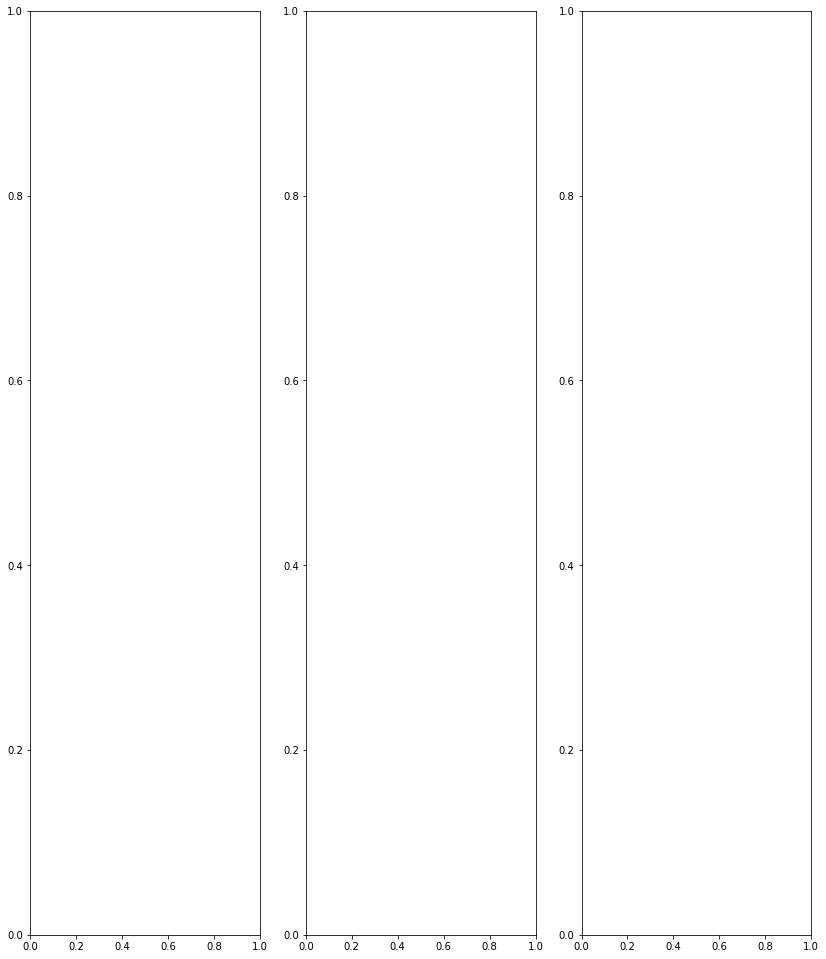

In [68]:
import matplotlib.pyplot as plt
#plot to see the changes in the parameters

fig, axs = plt.subplots(1, 3 , figsize=(14,17)) #generate the subplot
ind = ['Radius', 'Max_zone', 'Min_opacity']
p = 0
for i in range(0,1):
    for j in range(0,3):
        axs[i,j].plot(MAPS[p]);
        axs[i,j].set_title(ind[p])
        p+=1

plt.tight_layout();

In [ ]:
##### SKAL NOK SLETTES HER NED TIL!!!!!!!!!!!

### Detective skills

# INSERT PICTURE

* In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.

> By doing a detective google search on 'San Francisco bryant street' the second link was sending us directly to the Hall of Justice, more precis the Superior Court of California. It is placed on 850 Bryant St., which fits perfect to the place where a lot of crimes is happening. This could be because of the police force in San Francisco needs to place a location for the crime, and they could have the Court house as a dummy location, if nothing else is stated.

In [107]:
%%html
<a href=https://www.sfsuperiorcourt.org/general-info/directions/hall-of-justice?__cf_chl_captcha_tk__=fcd1a9e036de37ba1426b1852bf947afd82bb0bf-1582849405-0-AT4IlX0ZXdzRnJfVHQbac5Swq1bZ5BHhaJxGEXYLew0WYPIGj3hpR0GnJ9qoHNIQl991lls97EwKSymh509lmbjDCqiC-an6ESBb3ifbtUWmU6zTfWv6GF53rXmtKgaARlEdkQkZCde-GKqUb-GZXK5SPXmwShC8ajwNhnVG3pDfujkQ5lqsBCO41pnynS_QG9iFfdbeC14qgbFas625nv7jGQD9LP6ibLiHY_CGDfISy6jzkkQV7LeuE5L7_NErMh4RxntPWT7ozGXr9jeaVdc01L2oo8Yh6HeTY9m0xJDmzZ3JVw8VSc_9c86GYr2Pl4xSHL-aYTo1BDkh-UDYktt6AuXxCFo82zdF2d1JSWN9T7PqLMOHI09x7XRum2hkT6mJJ39T7P5c0s-rvUDDQpVXVu3SsNUbvL2d_P94GEak7m25BKZ2jF-qq3EPzsnL8HPib31at6C19o-1D7hJA2e_AZmbzDKmdhkX8aUmNGW_n4YYeeNW15m1DRv0W_MWXQ>Check out the link here</a>

### Heatmap movies

* Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).
* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.
* Create the movie using HeatMapWithTime.
* Comment on your results:
    * What patterns does your movie reveal?
    * Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

In [108]:
from folium import plugins

map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Ensure you're handing it floats
data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
df = data[data['Category'] == 'DRIVING UNDER THE INFLUENCE'] # Reducing data size so it runs faster
df_heat = df[['Y', 'X']] 


# Create weight column, using date
# year
#df_heat['Weight'] = df['Datetime'].dt.year 
# month
#df_heat['Weight'] = df['Datetime'].dt.month 
# day
df_heat['Weight'] = df['Datetime'].dt.day
                    #df['Date'].str[6:10] #Can also be called directly from 'Date'
                    
df_heat['Weight'] = df_heat['Weight'].astype(float)
#heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

# List comprehension to make out list of lists
#Year heatmap time
#data_heat = [[[row['Y'],row['X']] for index, row in df_heat[df_heat['Weight'] == i].iterrows()] for i in range(2013,2019)]
#Month heatmap time
#data_heat = [[[row['Y'],row['X']] for index, row in df_heat[df_heat['Weight'] == i].iterrows()] for i in range(1,13)]
#Day heatmap time
data_heat = [[[row['Y'],row['X']] for index, row in df_heat[df_heat['Weight'] == i].iterrows()] for i in range(1,32)]

# Plot it on the map
hm = plugins.HeatMapWithTime(data_heat,auto_play=True,max_opacity=0.8,index_steps=7) #index_steps = steps (days, months, years) it will jump when you plays
hm.add_to(map_SF)
# Display the map
map_SF

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# MANGLER KOMMENTAR, kommer der hvis I er enige med katagorien

## Part 6: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Wednesday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

Exercise: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.

This last exercise has two parts.
* In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* (Optional) Find your own example of human noise in the data and visualize it.